In [1]:
#Yi-Lin Lou #301226659
import pandas as pd
import tensorflow as tf
import numpy as np

data_path = './dataset/Metro_Interstate_Traffic_Volume.csv'
df = pd.read_csv(data_path)
df.head(5)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
holiday,61,11,Labor Day,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,48204.0,NaN,NaN,NaN,281.20587,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,NaN,NaN,NaN,0.334264,44.789133,0.0,0.0,0.0,0.0,9831.3
snow_1h,48204.0,NaN,NaN,NaN,0.000222,0.008168,0.0,0.0,0.0,0.0,0.51
clouds_all,48204.0,NaN,NaN,NaN,49.362231,39.01575,0.0,1.0,64.0,90.0,100.0
weather_main,48204,11,Clouds,15164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_description,48204,38,sky is clear,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,48204,40575,2013-05-19 10:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traffic_volume,48204.0,NaN,NaN,NaN,3259.818355,1986.86067,0.0,1193.0,3380.0,4933.0,7280.0


In [4]:
df['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [5]:
df['weather_main'].value_counts()

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [6]:
df['weather_description'].value_counts()

weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain       

C:\Users\lou22\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


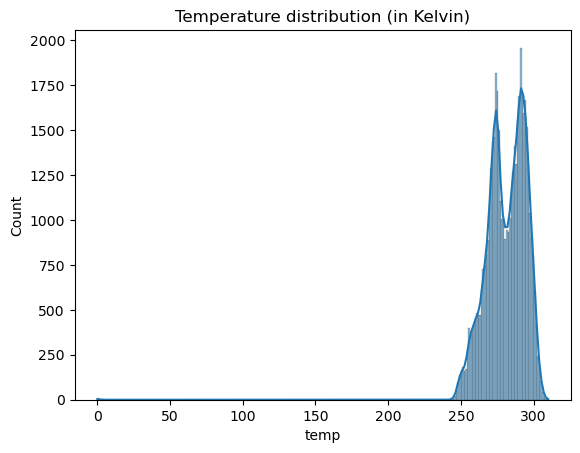

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.histplot(df['temp'], kde =True)
plt.title('Temperature distribution (in Kelvin)')
plt.show()

In [8]:
# convert holiday column into boolean values
df['holiday'] = df['holiday'].notnull().astype(int)


In [9]:
# extract feature is_rush_hour from datetime 
df['date_time'] = pd.to_datetime(df['date_time'])

def is_rush_hour(dt, holiday):
    if holiday == 1:
        return 0  # Not a rush hour if it's a holiday
    
    # Check if it's a weekday (Monday=0, Sunday=6)
    if dt.dayofweek >= 0 and dt.dayofweek <= 4:
        # Rush hour in the morning: 8:00 AM to 9:30 AM
        morning_start = dt.replace(hour=8, minute=0, second=0, microsecond=0)
        morning_end = dt.replace(hour=9, minute=30, second=0, microsecond=0)
        # Rush hour in the evening: 4:00 PM to 6:30 PM
        evening_start = dt.replace(hour=16, minute=0, second=0, microsecond=0)
        evening_end = dt.replace(hour=18, minute=30, second=0, microsecond=0)

        return int(morning_start <= dt <= morning_end or evening_start <= dt <= evening_end)
    else:
        return 0  # Not a rush hour if it's a weekend

df['is_rush_hour'] = df.apply(lambda row: is_rush_hour(row['date_time'], row['holiday']), axis=1)


In [10]:
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,is_rush_hour
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,0
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,0
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,0
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,0


In [11]:
X = df.drop(['traffic_volume', 'weather_description', 'date_time', 'rain_1h', 'snow_1h'],axis=1)


In [12]:
y =df['traffic_volume']

In [13]:
# Check for any missing values in the entire dataset
print(X.isnull().sum())


holiday         0
temp            0
clouds_all      0
weather_main    0
is_rush_hour    0
dtype: int64


In [14]:
num_cols = ['temp', 'clouds_all']
cat_cols = ['weather_main']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Assuming 'num_cols' and 'cat_cols' are defined

# Define the preprocessor globally
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse=False), cat_cols)
    ],
    remainder='passthrough'
)



def preprocess_data(df, preprocessor):
    processed_data = preprocessor.transform(df)

    feature_names = []
    for col in num_cols:
        feature_names.append(col)

    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
    feature_names.extend(cat_features)

    remainder_cols = [col for col in df.columns if col not in num_cols and col not in cat_cols]
    feature_names.extend(remainder_cols)

    df_processed = pd.DataFrame(processed_data, columns=feature_names, index=df.index)
    
    return df_processed






In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)




In [17]:
preprocessor.fit(X_train)
# Now, preprocess the splits

X_train = preprocess_data(X_train, preprocessor)
X_test = preprocess_data(X_test, preprocessor)
X_val = preprocess_data(X_val, preprocessor)

# Verify the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)

X_train shape: (34706, 14)
X_test shape: (9641, 14)
X_val shape: (3857, 14)


C:\Users\lou22\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:


def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


In [19]:
time_steps = 10  

X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, time_steps)

In [20]:
print(X_train_seq.shape)  
print(X_test_seq.shape)  
print(X_val_seq.shape)    


(34696, 10, 14)
(9631, 10, 14)
(3847, 10, 14)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.regularizers import l1_l2

# Adjusting input_shape based on your preprocessed data
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])  # [timesteps, features]

l1_reg = 0.01
l2_reg = 0.01

model = Sequential([
    Bidirectional(LSTM(228, activation='tanh', return_sequences=True, 
                       kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)), input_shape=input_shape),
    Dropout(0.2),
    Bidirectional(LSTM(228, activation='tanh', return_sequences=True,
                       kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))),
    Dropout(0.2),
    
    GRU(178, activation='tanh', return_sequences=True,
        kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),  # Keep return_sequences=True for stacking
    Dropout(0.2),
    GRU(128, activation='tanh', return_sequences=True,
        kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),  # Keep return_sequences=True for stacking
    Dropout(0.2),
    GRU(88, activation='tanh', return_sequences=False,  
        kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),  
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    Dropout(0.2),
    Dense(44, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    Dropout(0.1),
    Dense(1, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))  # Output layer for regression
])
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, 
              loss='mse',
              metrics=['mae'])


C:\Users\lou22\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 10, 456)             │         443,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 456)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 10, 456)             │       1,249,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 456)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 10, 178)             │         339,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 178)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 10, 128)             │         118,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 88)                  │          57,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           5,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 44)                  │           2,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 44)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,218,149 (8.46 MB)

 Trainable params: 2,218,149 (8.46 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=5,
    batch_size=64,
    validation_data=(X_val_seq, y_val_seq),
    verbose=1
)


Epoch 1/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 56s 78ms/step - loss: 8541974.0000 - mae: 2402.6277 - val_loss: 3925133.5000 - val_mae: 1745.1388
Epoch 2/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 40s 74ms/step - loss: 4223162.5000 - mae: 1788.6671 - val_loss: 3902859.0000 - val_mae: 1739.6002
Epoch 3/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - loss: 4136736.2500 - mae: 1765.1917 - val_loss: 3904464.5000 - val_mae: 1734.6965
Epoch 4/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 45s 82ms/step - loss: 4179039.2500 - mae: 1781.2639 - val_loss: 3895103.0000 - val_mae: 1736.0267
Epoch 5/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 47s 86ms/step - loss: 4239332.0000 - mae: 1787.2208 - val_loss: 3895625.0000 - val_mae: 1736.4330


In [24]:
test_loss, test_mae = model.evaluate(X_test_seq, y_test_seq, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3966852.2500 - mae: 1751.3273
Test Loss: 3955107.75, Test MAE: 1748.7877197265625


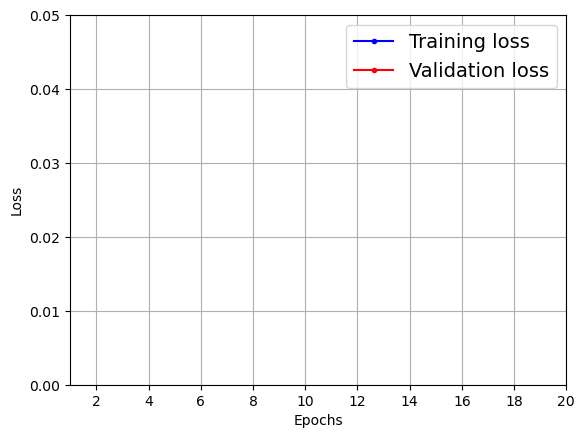

In [27]:
import matplotlib as mpl
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()